#Kết nối gg drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


#Clone model và cài đặt các requirements:

In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5  # clone

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/yolov5
%pip install -qr requirements.txt  # install

In [ ]:
import torch
from drive.MyDrive.yolov5 import utils
display = utils.notebook_init()  # checks


YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


#Upload và giải nén dataset

In [ ]:
!unrar x "/content/drive/MyDrive/Train_data.rar" "./data"

In [ ]:
!rm -rf /content/drive/MyDrive/test5

#Train yolov5s với bộ dữ liệu

In [ ]:
# Train YOLOv5
!python train.py --img 640 --batch 32 --epochs 50 --data /content/data_yaml.yaml --weights yolov5s.pt


train: weights=yolov5s.pt, cfg=, data=/content/data_yaml.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

Với số epoch = 50 ta có kết quả chạy là:

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt --source /content/drive/MyDrive/yolov5/data/Train_data/images/test/40_10.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/yolov5/data/Train_data/images/test/40_10.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/drive/MyDrive/yolov5/data/Train_data/images/test/40_10.jpg: 640x640 1 TuongOtChinSu, 12.0ms
Speed: 0.6ms pre-process, 12.0ms inference, 148.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


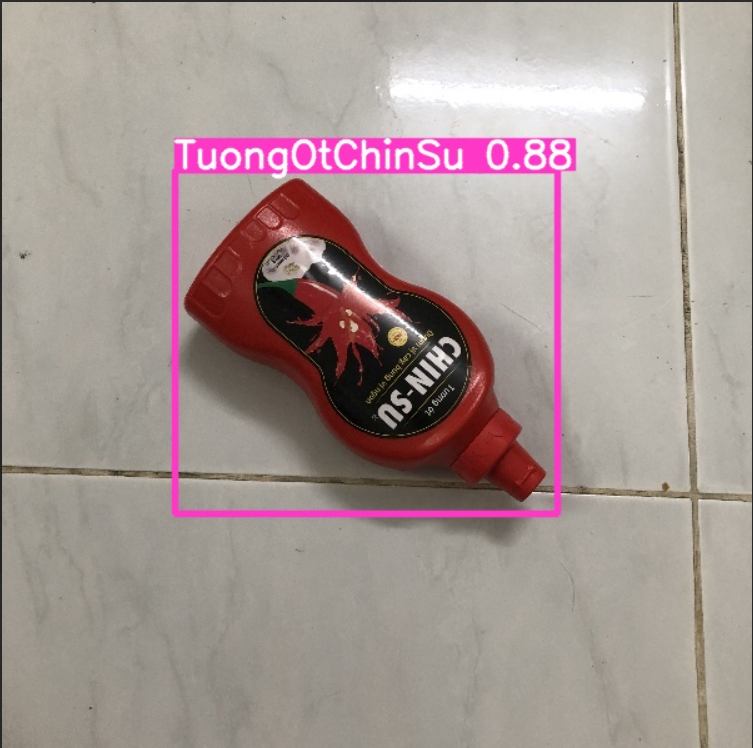

Sau khi huấn luyện xong, model sẽ được lưu trong địa chỉ yolov5/runs/train. Ta có thể tải về và chạy model này trên máy tính thông qua file best.pt đây là file model huấn luyện của mô hình

#Đánh giá mô hình trên bộ dữ liệu đánh giá mới thu thập Test_Mutiple

In [ ]:
!cp -r /content/drive/MyDrive/Test_Multiple /content/drive/MyDrive/yolov5/data

##Đánh giá với toàn bộ bộ dữ liệu Test_Multiple

Do cả 2 mô hình YOLOv5n và YOLOv5s dùng chung bộ dữ liệu Test_Multiple, với dữ liệu được lưu cùng một drive, nên dữ liệu Test_Multiple mà YOLOv5s cũng giống YOLOv5n

In [ ]:
!python val.py --data /content/drive/MyDrive/multiple_ymal.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/multiple_ymal.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5n/data/Test_Multiple/labels.cache... 315 images, 0 backgrounds, 0 corrupt: 100% 315/315 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/Test_Multiple/images/test2_1.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/Test_Multiple/images/test2_10.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /conten

##Đánh giá với từng mức số lượng sản phẩm trong khung hình

###Với khung hình có 2 sản phẩm

In [ ]:
!cp -r /content/drive/MyDrive/test2 /content/drive/MyDrive/yolov5/data

In [ ]:
!python val.py --data /content/drive/MyDrive/test2_yaml.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/test2_yaml.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5n/data/test2/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test2/images/test2_1.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test2/images/test2_10.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/dat

###Với khung hình có 3 sản phẩm

In [ ]:
!cp -r /content/drive/MyDrive/test3 /content/drive/MyDrive/yolov5/data

In [ ]:
!python val.py --data /content/drive/MyDrive/test3_yaml.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/test3_yaml.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5n/data/test3/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test3/images/test3_10.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test3/images/test3_11.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/da

###Với khung hình có 4 sản phẩm

In [ ]:
!cp -r /content/drive/MyDrive/test4 /content/drive/MyDrive/yolov5/data

In [ ]:
!python val.py --data /content/drive/MyDrive/test4_yaml.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/test4_yaml.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5n/data/test4/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test4/images/test4_1.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test4/images/test4_10.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/dat

###Với khung hình có 5 sản phẩm

In [ ]:
!cp -r /content/drive/MyDrive/test5 /content/drive/MyDrive/yolov5/data

In [ ]:
!python val.py --data /content/drive/MyDrive/test5_yaml.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/test5_yaml.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7128793 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5n/data/test5/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test5/images/test5_1.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/test5/images/test5_10.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5n/data/t

#Thông tin bộ dữ liệu huấn luyện/đánh giá mô hình




Bộ dữ liệu được chia thành 80/10/10 tương ứng với Train/Val/Test

Bộ dữ liệu gồm 44 class, được training trên mô hình Yolov5s

Dataset được phân nhánh để phù hợp với mô hình theo sơ đồ


    Train_data
              \_images
                      \_train
                      \_val
                      \_test
              \_labels
                      \_ train
                      \_val
                      \_test
    Test_Multiple
              \_images
              \_labels
    test2, test3, test4, test5
              \_images
              \_labels
Tất cả thông tin về classes, path được lưu trong file data_yaml.yaml, với các bộ test2, test3, test4, test5 có các file .yaml khác nhau